# Atividade 1

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.pyplot as plt

## Exercicio 1

Considere um gerador linear congruente misto com os seguintes parametros:

$X_{(n+1)} = (aX_n + c) \mod m$

onde $a=5$, $m=16$, $c=3$ e $X_0=7$

In [2]:
def gerador_linear_misto(a, c, m, x0, num):
    sequence = []
    for i in range(num):
        x0 = (a * x0 + c) % m
        sequence.append(x0)
    return sequence

In [3]:
a = 5
c = 3
m = 16
x0 = 7

### a) Calcule os 5 primeiros digitos

In [4]:
num  = 5
sequence = gerador_linear_misto(a, c, m, x0, num)
_ = [print(i) for i in sequence]

6
1
8
11
10


#### Resposta Analitica
$X_1 = (5*7 + 3) \mod 16 = 38 \mod 16 = 6$

$X_2 = (5*6 + 3) \mod 16 = 33 \mod 16 = 1$

$X_3 = (5*1 + 3) \mod 16 = 8 \mod 16 = 8$

$X_4 = (5*8 + 3) \mod 16 = 43 \mod 16 = 11$

$X_5 = (5*11 + 3) \mod 16 = 58 \mod 16 = 10$

### b) Determine o periodo desse gerador

In [5]:
num = 20
sequence = gerador_linear_misto(a, c, m, x0, num)
_ = [print(i) for i in sequence]

6
1
8
11
10
5
12
15
14
9
0
3
2
13
4
7
6
1
8
11


#### Resposta Analitica:
$m$ e $c$ sao primos entre si.

Os divisores de 16 sao 2, 4, 8 e 16. Portanto 2 é o único primo divisor de 16. os divores de $a-1=4$, sao 2 e 4. Assim, 2 e o primo divisor de $m$ e $a-1$.

$a-1$ e um multiplo de 4, se o inteiro $m$ e multiplo de 4.

Assim, o comprimendo da sequencia e maximo e igual a $m=16$

### c) Explique se este GLC misto é adequado para aplicações criptográficas. Justifique sua resposta.

#### Resposta:
O Periodo do codigo e pequeno o que torna as sequencias facil de ser quebradas, pois e possivel encontrar a funcao que gerou a sequencia. Portanto, nao e viavel utiliza-lo para criptografia.

## Exercico 2.
Em uma central telefônica, o número médio de chamadas recebidas por minuto é igual a 3. Suponha que o número de chamadas recebidas por minuto siga uma distribuição Poisson.

In [6]:
def poisson(lam, k):
    return (np.exp(-lam) * lam**k) / math.factorial(k)

In [7]:
def gen_poisson_random_variable(lamb, n_samples):
  count=0
  av=np.array([])
  x=np.random.uniform(0,1,n_samples)
  for ix in x:
      i = 0
      pr = np.exp(-lamb)
      F=pr
      while ix>=F:
          pr=lamb/(i+1)*pr
          F = F + pr
          i = i + 1;
      a1=i
      av=np.append(av,a1)

  return av

In [8]:
lamb = 3 # chamadas/minuto

### a) Qual é a probabilidade de que exatamente 5 chamadas sejam recebidas em um minuto específico?

In [9]:
theo = poisson(lamb, 5)
samples = gen_poisson_random_variable(lamb, 10000)
simulated = np.mean(samples == 5)
print(f'Teorica: {theo}')
print(f'Simulada: {simulated}')

Teorica: 0.10081881344492448
Simulada: 0.0988


#### Resposta Analitica:

$\lambda=3$ chamadas/minuto

$P(x=5) = e^{-3} 3^5 / 5! = 0.1$

### b) Qual é a probabilidade de que no máximo 2 chamadas sejam recebidas em um minuto específico?

In [10]:
# calcular todas a probabilidades de 0, 1, 2
probs = [poisson(lamb, i) for i in range(3)]
theo = np.sum(probs)
samples = gen_poisson_random_variable(lamb, 10000)
simulated = np.mean(samples <= 2)
print(f'Teorica: {theo}')
print(f'Simulada: {simulated}')

Teorica: 0.42319008112684353
Simulada: 0.4256


#### Resposta Analitica:
$P(x=0) = e^{-3} 3^0 / 0! = 0.049$

$P(x=1) = e^{-3} 3^1 / 1! = 0.149$

$P(x=2) = e^{-3} 3^2 / 2! = 0.224$

$P(x\leq2) = P(x=0) + P(x=1) + P(x=2) = 0.423$

## Exercicio 3:

Uma prova objetiva possui 10 questões, e cada questão apresenta 4 alternativas, das quais
apenas uma é correta. Um aluno despreparado responde aleatoriamente todas as questões,
assinalando uma alternativa por questão.
Considere que X seja a variável aleatória que representa o número de questões acertadas pelo
aluno.

In [11]:
def binomial(n, p, k):
    return math.comb(n, k) * p**k * (1-p)**(n-k)

def gen_binomial_random_variable(n, q, n_samples):
  c = q/(1-q)
  av=np.array([])
  count=0
  x=np.random.uniform(0,1,n_samples)
  for ix in x:
      i = 0
      pr = pow((1 - q),n)
      F = pr
      while ix>=F:
          pr = (c * (n - i) / (i + 1))* pr;
          F = F + pr;
          i = i + 1;
      a1=i
      av=np.append(av,a1)

  return av

In [12]:
q = 0.25 # probabilidade de acertar uma questão

### a) Qual é a probabilidade de o aluno acertar exatamente 3 questões?


In [13]:
theo = binomial(10, q, 3)
samples = gen_binomial_random_variable(10, q, 10000)
simulated = np.mean(samples == 3)
print(f'Teorica: {theo}')
print(f'Simulada: {simulated}')

Teorica: 0.25028228759765625
Simulada: 0.248


#### Resposta Analitica
$P(x=3) = {10 \choose 3} (0.25)^3 (0.75)^7 = 0.25$

### b) Qual é a probabilidade de ele acertar no máximo 2 questões?

In [14]:
theo = np.sum([binomial(10, q, i) for i in range(3)])
simulated = np.mean(samples <= 2)
print(f'Teorica: {theo}')
print(f'Simulada: {simulated}')

Teorica: 0.5255928039550781
Simulada: 0.525


#### Resposta Analitica

$P(x=0) = {10 \choose 0} (0.25)^0 (0.75)^10 = 0.25 = 0.056$

$P(x=1) = {10 \choose 1} (0.25)^1 (0.75)^9 = 0.25d = 0.187$

$P(x=2) = {10 \choose 2} (0.25)^2 (0.75)^8 = 0.25 = 0.281$

$P(x\leq2) = P(x=0) + P(x=1) + P(x=2) = 0.525$

### c) Determine a média e o desvio padrão da variável aleatória X.

In [15]:
media = 10*q
desvio = math.sqrt(10*q*(1-q))
print(f'Media: {media}')
print(f'Desvio: {desvio}')

Media: 2.5
Desvio: 1.3693063937629153


In [16]:
media_sim = np.mean(samples)
desvio_sim = np.std(samples)
print(f'Media: {media_sim}')
print(f'Desvio: {desvio_sim}')

Media: 2.496
Desvio: 1.368570056664985


#### Resposta Analitica
$\mu = nq = 10*0.25 = 2.5$

$\sigma = \sqrt{nq(1-q)} = 1.36$

## Exercicio 4

Se ocorrerem falhas de energia elétrica de acordo com uma distribuição de Poisson com
uma média de 6 falhas a cada duas semanas, calcule a probabilidade de que haverá ao menos
3 falhas durante uma semana específica. Traçar o histograma da variável analisada.

In [17]:
lamb = 3

In [18]:
prob_3_ou_menos = 1 - poisson(lamb, 0) - poisson(lamb, 1) - poisson(lamb, 2)
print(f'Probabilidade de haver pelo menos 3 falhas: {prob_3_ou_menos}')

Probabilidade de haver pelo menos 3 falhas: 0.5768099188731565


In [19]:
samples = gen_poisson_random_variable(lamb, 10000)
simulated = np.mean(samples >= 3)
print(f'Probabilidade de haver pelo menos 3 falhas: {simulated}')

Probabilidade de haver pelo menos 3 falhas: 0.5754


#### Resposta Analitica:
$P(x=0) = e^{-3} 3^0 / 0! = 0.049$

$P(x=1) = e^{-3} 3^1 / 1! = 0.149$

$P(x=2) = e^{-3} 3^2 / 2! = 0.224$

$P(x\geq3) = 1 - P(x=0) + P(x=1) + P(x=2) =1 - 0.423 = 0.576$

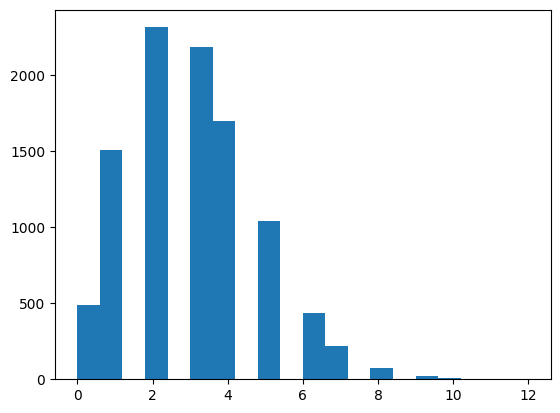

In [20]:
samples = gen_poisson_random_variable(lamb, 10000)
_ = plt.hist(samples, bins=20)

## Exercicio 5

O tempo (em minutos) entre chegadas sucessivas de clientes a um caixa eletrônico pode ser
descrito por uma variável aleatória com distribuição exponencial, cuja média é de 2 minutos

In [21]:
def cdf_exp(lam, x):
    return 1 - np.exp(-lam * x)

def gen_exponential_random_variable(lam, n_samples):
  x=np.random.uniform(0,1,n_samples)
  Xexp=-np.log(x)/lam
  return Xexp

### a) Qual é o parâmetro (λ) dessa distribuição exponencial?

#### Resposta:

$\mu = 2$

$\lambda = 1/\mu = 0.5$

In [22]:
lamb = 1 / 2

### b) Qual é a probabilidade de que o tempo de espera até a chegada do próximo cliente seja inferior a 1 minuto?

In [23]:
theo = cdf_exp(lamb, 1)
samples = gen_exponential_random_variable(lamb, 10000)
simulated = np.mean(samples < 1)
print(f'Teorica: {theo}')
print(f'Simulada: {simulated}')

Teorica: 0.3934693402873666
Simulada: 0.3992


#### Resposta Analitica

$P(x\leq1) = F(x) = 1 - e^{-0.5} = 0.393$

### c) Qual é a probabilidade de que o tempo de espera até a chegada do próximo cliente seja superior a 4 minutos?

In [24]:
theo = 1 - cdf_exp(lamb, 4)
samples = gen_exponential_random_variable(lamb, 10000)
simulated = np.mean(samples > 4)
print(f'Teorica: {theo}')
print(f'Simulada: {simulated}')

Teorica: 0.1353352832366127
Simulada: 0.1341


#### Resposta Analitica

$P(x\leq4) = 1 - F(4) = e^{-0.5*4} = 0.135$

## Exercico 6

A distribuição discreta geométrica conta o número de tentativas até o primeiro sucesso. A
pmf é dada por f(x)=p(1-p)x-1, onde p representa a probabilidade de sucesso e x o numero de
tentativas. Fazer um algoritmo para a geração das variáveis aleatórias geométricas.

### Algoritmo

$F(x) = 1 - (1-p)^{x}$

$(1-p)^{x} = u-1$

$x = \frac{log(1-U)}{log(1-p)}$

$x = ceil{ {\frac{log(U)}{log(1-p)}} }$

In [25]:
def gen_geom_random_variable(p, n_samples):
    U = np.random.uniform(0, 1, n_samples)
    X = np.ceil(np.log(U) / np.log(1 - p)).astype(int)
    return X

def geom(p, k):
    return p * (1 - p)**(k-1)

### Calcular

Um jogador participa de um jogo no qual ele lança um dado justo (equilibrado, com 6
faces numeradas de 1 a 6). Ele ganha o jogo assim que o número "5" aparecer pela
primeira vez. Considere que os lançamentos são independentes.

Seja X a variável aleatória que representa o número do lançamento no qual o jogador
obtém pela primeira vez o número "5".

In [26]:
# dado com 6 faces, chance de obter 5
p = 1/6

### a) Qual é a probabilidade de que o jogador ganhe o jogo exatamente no terceiro lançamento?

In [27]:
theo = geom(p, 3)
samples = gen_geom_random_variable(p, 10000)
simulated = np.mean(samples == 3)
print(f'Teorica: {theo}')
print(f'Simulada: {simulated}')

Teorica: 0.11574074074074076
Simulada: 0.1114


#### Resposta Analitica

$P(x=3) = (1/6)*(1-1/6)^{2} = 0.115$

### b) Qual é a probabilidade de que ele precise lançar o dado pelo menos 4 vezes para ganhar o jogo?

In [28]:
def geom_cdf(p, k):
    return 1 - (1 - p)**k

In [29]:
theo = geom_cdf(p, 4)
samples = gen_geom_random_variable(p, 10000)
simulated = np.mean(samples >= 4)

print(f'Teorica: {theo}')
print(f'Simulada: {simulated}')

Teorica: 0.5177469135802468
Simulada: 0.5796


#### Resposta Analitica

$P(x \geq 4) = 1 - F(x) = (1-1/6)^{4} = 0.517$

### c) Calcule a média e o desvio padrão de X.

In [30]:
media = 1/p
desvio = math.sqrt((1-p))/p
print(f'Media: {media}')
print(f'Desvio: {desvio}')

Media: 6.0
Desvio: 5.477225575051662


In [31]:
media_sim = np.mean(samples)
desvio_sim = np.std(samples)
print(f'Media: {media_sim}')
print(f'Desvio: {desvio_sim}')

Media: 5.9931
Desvio: 5.3588853682459


#### Resposta Analitica

$\mu = 1/p = 6$

$\sigma = \sqrt{1-p}/p = 5.47$

## Exercicio 7

7) Utilizando o método da inversa gerar amostras para a distribuição

$f(x) = 3 x^2 \quad 0\leq x \leq 1$
Plotar a pdf analitica e o histograma normalizado.

### Resposta:

$ F(x) = \int_{0}^{x} f(x) dx $

$ F(x) = x^3 $

$ u = x^3 $

$ x = u^{1/3}$


In [32]:
def gen_inverse_transform_random_variable(n_samples):
    u = np.random.uniform(0, 1, n_samples)
    x = u**(1/3)
    return x

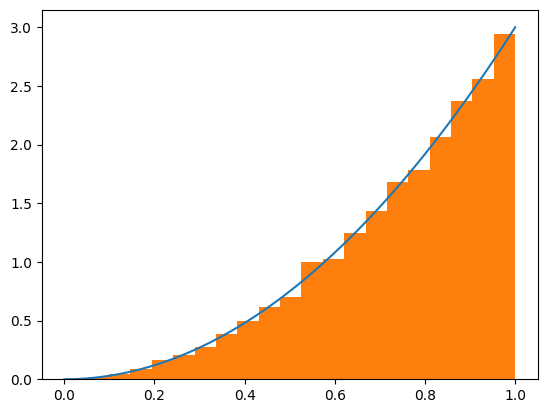

In [33]:
samples = gen_inverse_transform_random_variable(10000)

x_ = np.linspace(0, 1, 100)
y_ = 3 * x_**2
fig = plt.figure()
plt.plot(x_, y_)
plt.hist(samples, bins=20, density=True)
plt.show()

## Exercicio 8

Considere uma variável aleatória contínua X cuja função densidade de probabilidade (pdf) é
dada por:

$f(x) = 3 x^2 \quad 0\leq x \leq 1$


e f(x)=0, caso contrário.
Suponha que você queira gerar valores dessa variável usando o método da aceitação-rejeição.

### a) Verifique que f(x) é uma densidade válida

#### Resposta

$ \int_{0}^{1} f(x) dx = \int_{0}^{1}  x^2 dx 3 = 1^3 - 0^1 = 1$

Portanto, a distribuicao e valida.

### b) Encontre uma constante c adequada para a aplicação do método da aceitação-rejeição, considerando a distribuição candidata escolhida.

#### Resposta

$g(x) = 1 \quad 0\leq x \leq 1$

$c = max(\frac{f(x)}{g(x)}) = max(3 x^2)$

$c = 3$

### c)  Explique o procedimento passo a passo para gerar uma observação de X usando esse método. Plotar a pdf analitica e o histograma normalizado.

#### Resposta:

(1)Gerar uma variavel aleatdoria U1 de uma distribuicsao conhecida
g(x) = 1;

(2) Gerar U2 independente de U1;

(3) Se $U \leq \frac{f(u1)}{c g(u1)} $.
Entao aceita-se a amostra, senao
rejeita e volta ao passo 1

In [34]:
def gen_accept(n_samples):
  samples = []
  while len(samples) < n_samples:
      U1 = np.random.uniform(0, 1)
      U2 = np.random.uniform(0, 1)
      if U2 <= U1 ** 2:
          samples.append(U1)
  return np.array(samples)

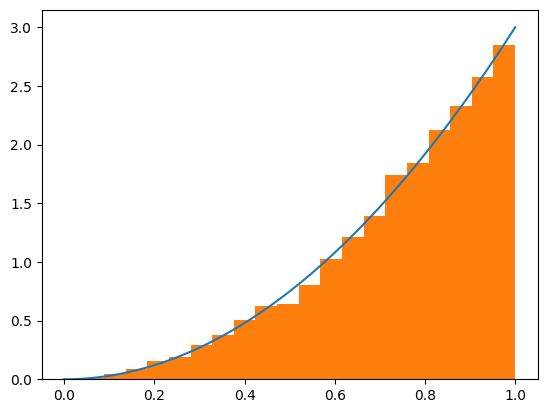

In [35]:
samples = gen_accept(10000)

x_ = np.linspace(0, 1, 100)
y_ = 3 * x_**2
fig = plt.figure()
plt.plot(x_, y_)
plt.hist(samples, bins=20, density=True)
plt.show()